In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 180MB/s]
100% 1.06G/1.06G [00:07<00:00, 163MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators -create batches
train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating CNN model

model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 3810s 6s/step - loss: 1.5031 - accuracy: 0.5656 - val_loss: 0.6443 - val_accuracy: 0.5874
Epoch 2/10
625/625 [==============================] - 3699s 6s/step - loss: 0.6444 - accuracy: 0.6166 - val_loss: 0.7256 - val_accuracy: 0.4980
Epoch 3/10
625/625 [==============================] - 3692s 6s/step - loss: 0.5593 - accuracy: 0.6906 - val_loss: 0.6472 - val_accuracy: 0.6302
Epoch 4/10
625/625 [==============================] - 3671s 6s/step - loss: 0.4789 - accuracy: 0.7588 - val_loss: 0.5360 - val_accuracy: 0.7210
Epoch 5/10
625/625 [==============================] - 3761s 6s/step - loss: 0.4198 - accuracy: 0.7910 - val_loss: 0.4667 - val_accuracy: 0.7744
Epoch 6/10
625/625 [==============================] - 3794s 6s/step - loss: 0.3683 - accuracy: 0.8215 - val_loss: 0.4646 - val_accuracy: 0.7764
Epoch 7/10
625/625 [==============================] - 3724s 6s/step - loss: 0.3160 - accuracy: 0.8500 - val_loss: 0.5413 - val_accuracy:

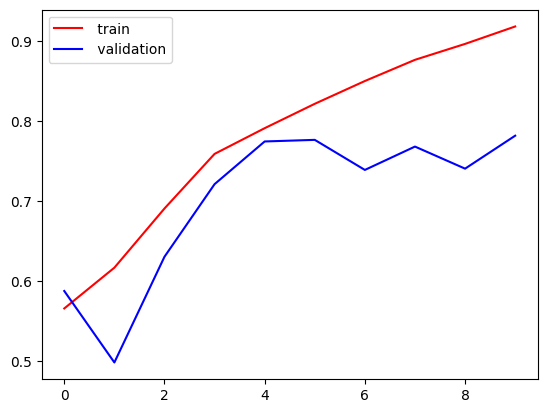

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'] , color='red' , label=' train')
plt.plot (history.history[ 'val_accuracy'], color='blue' , label =' validation' )
plt.legend ()
plt.show()

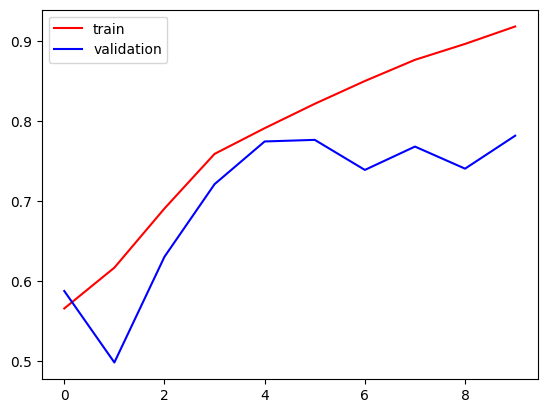

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label ='validation' )
plt.legend()
plt.show()

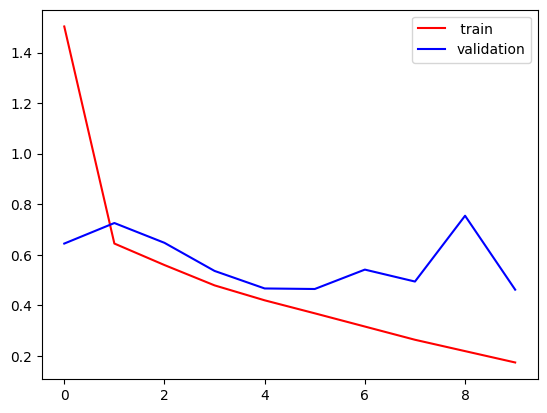

In [ ]:
plt.plot(history.history['loss'] ,color='red',label=' train')
plt.plot (history.history['val_loss'],color='blue',label='validation')
plt.legend ()
plt.show()

In [ ]:
#need to reduce complexity


#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread ('/content/cat.jpg')

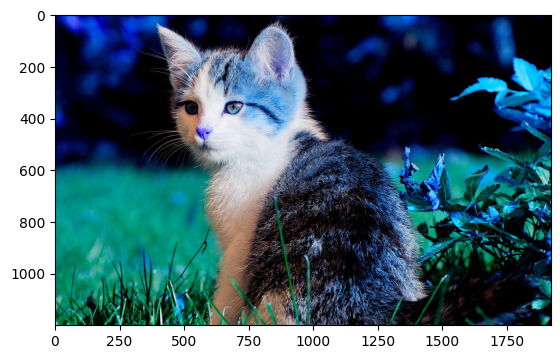

In [ ]:
plt.imshow (test_image)

In [ ]:
test_image.shape

(1200, 1920, 3)

In [ ]:
test_image = cv2.resize (test_image, (256, 256) )

In [ ]:
test_input = test_image.reshape (1, 256, 256, 3)

In [ ]:
model.predict (test_input)

1/1 [==============================] - 0s 255ms/step


array([[1.]], dtype=float32)